In [2]:
import pandas as pd
import pandas as pd
import sys
import os
scripts_path = "../scripts"
sys.path.append(scripts_path)


In [3]:
df_upward = pd.read_csv('../data/processed/NS-time table for_processed_Upward.csv')
df_downward = pd.read_csv('../data/processed/NS-time table for_processed_Downward.csv')

In [4]:
print("df_upward", df_upward.columns)
print("df_downward", df_downward.columns)

df_upward Index(['Stations', 'station_id', 'train_id', 'Arrival', 'Departure',
       'Dwell Time'],
      dtype='object')
df_downward Index(['Stations', 'station_id', 'train_id', 'Arrival', 'Departure',
       'Dwell Time'],
      dtype='object')


In [5]:
df_upward['Dwell Time'] = pd.to_timedelta(df_upward['Dwell Time']).dt.total_seconds() / 60
df_downward['Dwell Time'] = pd.to_timedelta(df_downward['Dwell Time']).dt.total_seconds() / 60


In [6]:
#drop NS27
df_upward = df_upward[df_upward['station_id'] != 'NS27']
df_downward = df_downward[df_downward['station_id'] != 'NS27']

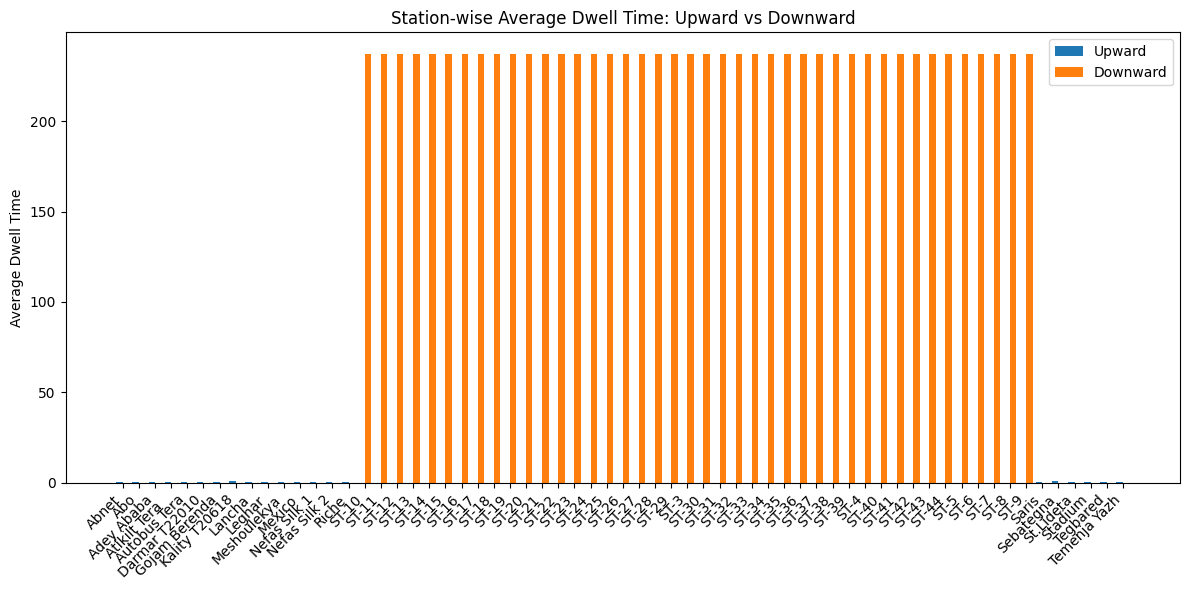

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Group and calculate average dwell time
upward_avg = df_upward.groupby('Stations')['Dwell Time'].mean().reset_index().rename(columns={'Dwell Time': 'Upward'})
downward_avg = df_downward.groupby('Stations')['Dwell Time'].mean().reset_index().rename(columns={'Dwell Time': 'Downward'})

# Step 2: Merge on station
dwell_comparison = pd.merge(upward_avg, downward_avg, on='Stations', how='outer').fillna(0)

# Step 3: Plot
plt.figure(figsize=(12, 6))
x = range(len(dwell_comparison['Stations']))
plt.bar([i - 0.2 for i in x], dwell_comparison['Upward'], width=0.4, label='Upward')
plt.bar([i + 0.2 for i in x], dwell_comparison['Downward'], width=0.4, label='Downward')

plt.xticks(x, dwell_comparison['Stations'], rotation=45, ha='right')
plt.ylabel('Average Dwell Time')
plt.title('Station-wise Average Dwell Time: Upward vs Downward')
plt.legend()
plt.tight_layout()
plt.show()


In [8]:
import importlib
import time_analysisss
importlib.reload(time_analysisss)
from time_analysisss import compute_station_gap_stats
df_upward['Arrival'] = pd.to_datetime(df_upward['Arrival'], errors='coerce')
df_downward['Arrival'] = pd.to_datetime(df_downward['Arrival'], errors='coerce')

station_stats_up = compute_station_gap_stats(df_upward)
station_stats_down = compute_station_gap_stats(df_downward)

print("Station stats upward:", station_stats_up)
print("Station stats downward:", station_stats_down)


Computed station gap stats:
          Stations    Avg_Gap   Min_Gap  Max_Gap   Gap_Std
7    Kality T20618  14.764103  5.866667     23.0  3.314762
0            Abnet  14.769231  6.000000     23.0  3.306099
2       Adey Ababa  14.769231  6.000000     23.0  3.306099
1              Abo  14.769231  6.000000     23.0  3.306099
3   Atikilt Tera    14.769231  6.000000     23.0  3.306099
4     Autobus Tera  14.769231  6.000000     23.0  3.306099
5    Darmar T22010  14.769231  6.000000     23.0  3.306099
6    Gojam Berenda  14.769231  6.000000     23.0  3.306099
8           Lancha  14.769231  6.000000     23.0  3.306099
9           Leghar  14.769231  6.000000     23.0  3.306099
10     Meshoulekya  14.769231  6.000000     23.0  3.306099
11          Mexico  14.769231  6.000000     23.0  3.306099
12    Nefas Silk 1  14.769231  6.000000     23.0  3.306099
13    Nefas Silk 2  14.769231  6.000000     23.0  3.306099
14           Riche  14.769231  6.000000     23.0  3.306099
15           Saris  14.76923

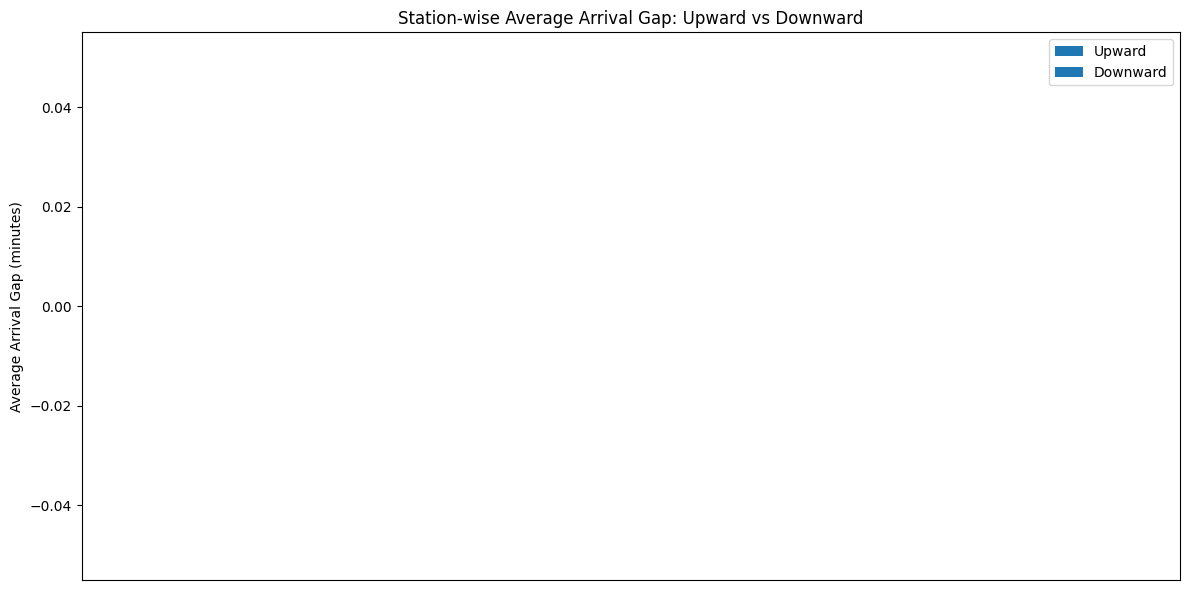

In [10]:
import matplotlib.pyplot as plt

# Merge on Stations
gap_comparison = station_stats_up.merge(
    station_stats_down,
    on='Stations',
    suffixes=('_Upward', '_Downward'),
    how='inner'
)

# Plot
plt.figure(figsize=(12, 6))
x = range(len(gap_comparison))
plt.bar([i - 0.2 for i in x], gap_comparison['Avg_Gap_Upward'], width=0.4, label='Upward')
plt.bar([i + 0.2 for i in x], gap_comparison['Avg_Gap_Downward'], width=0.4, label='Downward')

plt.xticks(x, gap_comparison['Stations'], rotation=45, ha='right')
plt.ylabel('Average Arrival Gap (minutes)')
plt.title('Station-wise Average Arrival Gap: Upward vs Downward')
plt.legend()
plt.tight_layout()
plt.show()
